# Table of Content

1. [Introduction](#Introduction)
2. [Imports](#Imports)
5. [Data Processing](#Data-Processing) <br>
5.1 [Normalization](#Normalization)


## Introduction

This notebook is an attempt at solving a CAPTCHA test.

## Imports

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import imutils

## Data Processing

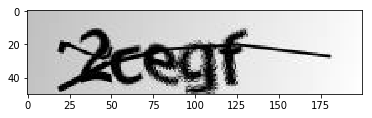

In [5]:
#Load image and convert to grey.
img = cv2.imread('samples/2cegf.png', 0)
plt.imshow(img, 'gray')

Here we will take the image: a 5 letter word with some noise and remove the noise. We will attempt different methods and see which ones perform the best on the data. <br> Firstly, we will convert the image to black and white. We will use Thresholding to do so. Adaptive thresholding will determine when to set the image to black or white relative to the pixel's environment. That is usefull given the different shades of grey in the image. Otsu Thresholding will calculate a threshold value from the image histogram. We will also try applying a Blur to remove the noise on the image (the fading on the 4th letter).

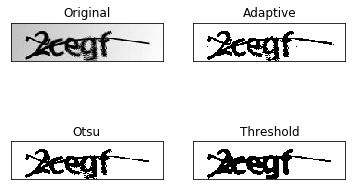

In [6]:
# From RGB to BW
# Adaptive thresholding
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)

# Otsu thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu thresholding with Gaussian Blur
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Plot
titles = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images = [img, th, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.title('Threshold')
plt.show()

Then we will try to remove the noise (the line that traverses the image). We will perform Erosions and Dilations (because it is black on white, erosion dilates and dilation erodes). These operation are Morphological Transformations: mathematical operations perfomed on the image's pixels. They will traverse the image with a matrix of nxm (3 by 3 in our case) and multiply the image with it and save the result.

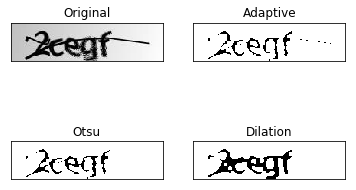

In [7]:
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(th, kernel, iterations=1)
dilation2 = cv2.dilate(th2, kernel, iterations=1)
dilation3 = cv2.dilate(th3, kernel, iterations=1)

titles2 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images2 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()


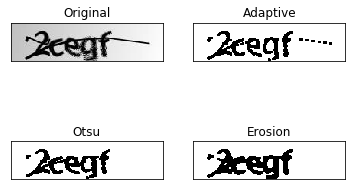

In [8]:
erosion = cv2.erode(dilation, kernel, iterations=1)
erosion2 = cv2.erode(dilation2, kernel, iterations=1)
erosion3 = cv2.erode(dilation3, kernel, iterations=1)

titles3 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images3 = [img, erosion, erosion2, erosion3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Erosion')
plt.show()


Now we perform a last Morphological Transformations butthis time the kernel is 3x1 to reduce the height of the line.

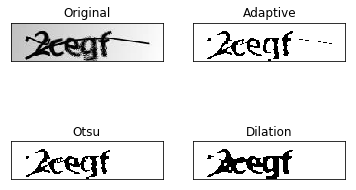

In [9]:
kernel = np.ones((3,1), np.uint8)
dilation = cv2.dilate(erosion, kernel, iterations=1)
dilation2 = cv2.dilate(erosion2, kernel, iterations=1)
dilation3 = cv2.dilate(erosion3, kernel, iterations=1)

titles4 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images4 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])

plt.title('Dilation')
plt.show()


There is no way to isolate the letters (by removing the line) without distoring the letters and making them irecognizable. Since the letter are always at the same place, we can simply extract them by hardcoding the coordinates.

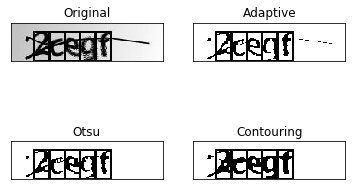

In [10]:
#Get the individual letters.
x, y, w, h = 30, 12, 20, 38
for  i in range(5):
    # get the bounding rect
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w

titles3 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images3 = [img, dilation, dilation2, dilation3] #img, opening, opening2, opening3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])

plt.title('Contouring')
plt.show()
